# Gradient Boosting

Gradient Boosting is probably one the most widely machine learning algorithms.

For pedagogical reasons, we will speak first about the regression methods, and then explain how it works with classification.

## I. Regression with Gradient Boosting

Gradient Boosting is close to AdaBoost:
- Trees are grown on the errors of the previous one
- Each tree has a weight

But there are some differences:
- We start by predicting the average value of the $y$ column, and then only build a decision tree based on that prediction
- The decision trees are not stumps, but real trees
- A scale factor is applied to all the trees

## I.1. Step by step training

Let's dive into the algorithm, by having a step by step description. Just like we did with adaboost.

Let's consider a simple dataset in which we have several features, $x_1, x_2, x_3, x_4$ and a label $y$.

![](images/step0.png)

**Step 1**: Make the first guess with mean

The initial guess of the Gradient Boosting algorithm is **the average value $\hat{y}$ of the target $y$**. This will be considered as the first level prediction.

Here the average value is $\hat{y} = 16.9$:

![](images/step1.png)

**Step 2**: Compute the pseudo-residuals

We then compute the difference between the labels and the predictions we made: $y - \hat{y}$.

This is called the pseudo-residuals:

![](images/step2.png)

**Step 3**: Train a decision tree to predict the pseudo-residuals

We will finally train the first decision tree. That tree will use the features $x_1, x_2, x_3, x_4$, and predict as label the *pseudo residuals*. This would mean having the following dataset:

![](images/step3.png)

We can now predict the pseudo-residuals $\text{res_pred}_1$ using a tree, like for example the following:

> For pedagogical reasons, the values will not be optimal here

![](images/step3_tree.png)

Finally, let's assume the results are the following:

![](images/step3_results.png)

**Step 4**: Perform a prediction and compute the new residuals


We can now perform the prediction of the first decision tree.

This prediction will be the following:

$$
\hat{y}_1 = \hat{y} + \alpha \times \text{res_pred_1}
$$

Where:
- $\hat{y}$ is the first prediction (the average $y$)
- $\text{res_pred_1}$ is the residual prediction of the first decision tree
- $\alpha$ is the learning rate, between 0 and 1, typically smaller than 1

This $\alpha$ will allow not to overshoot the optimal value, and learn more gently.

We will then compute the new pseudo residuals $y - \hat{y}_1$. The results could be the following with a learning $\alpha = 0.5$:

![](images/step4.png)

Notice how our pseudo residuals decreased, meaning our model is learning.

**Step 5**: Iterate with another prediction

The next steps are to iterate over:
- build another tree
- compute the predictions of pseudo residuals of previous tree
- compute the pseudo residuals according to the prediction

Until either:
- a maximum number of iteration is reached
- the improvement from a tree to the next is below a given threshold

## I.2. Prediction

Finally we can compute a prediction, using:
- The features $x_1, x_2, x_3, x_4$
- The average first guess $\hat{y}$ (computed on the train set!)
- The pseudo residual prediction of each decision tree $i$: $\text{res_pred_i}$
- The learning rate $\alpha$

The final prediction will then be:

$$
y_{pred} = \hat{y} + \alpha \sum_i \text{res_pred_i}
$$

Notice that we apply the same learning rate $\alpha$ to each decision tree.

## I.3. Illustration

Below are some displays of a gradient boosting algorithm, at several number of iterations:
- the blue dots are the labels $y$
- the red line is the model prediction

<p align="center">
<img src="images/boosting_steps.png">
</p>

## I.4. [Optional] Pseudo-code

### Pseudo-Code :

The algorithm can be then described as the following, on a dataset $(x,y)$ with $x$ the features and $y$ the targets, with a differentiable loss function $\cal{L}$:

$\cal{L} = \frac {1} {2} (Obs - Pred)^2$, called the Squared Residuals. Notice that since the function is differentiable, we have :

$$ \frac { \delta } {\delta Pred} \cal{L} = - 1 \times (Obs - Pred) $$

**Step 1** : Initialize the model with a constant value : $F_0(x) = argmin_{\gamma} \sum_i \cal{L}(y_i, \gamma)$. We simply want to minimize the sum of the squared residuals (SSR) by choosing the best prediction $\gamma$.
    
If we derive the optimal value for  $\gamma$ :

$$ \frac { \delta } {\delta \gamma } \sum_i \cal{L}(y_i, \gamma) = -(y_1 - \gamma) + -(y_2 - \gamma) + -(y_3 - \gamma) + ... = 0 $$

$$ \sum_i y_i - n * \gamma = 0 $$

$$ \gamma = \frac{ \sum_i y_i }{n} = \bar{y} $$

This is simply the average of the observations. This justifies our previous constant initialization. In other words, we created a leaf that predicts all samples will weight the average of the samples.

**Step 2** : For m = 1 to M (the maximum number of trees specified, e.g 100) 

- a) Compute the pseudo-residuals for every sample :
    
    $$ r_{im} = - \frac {\delta \cal{L} (y_i, F(x_i)) } {\delta F(x_i)} = - ( - 1 \times (Obs - F_{m-1}(x)) ) = (Obs - F_{m-1}(x)) = (Obs - Pred) $$
    
This derivative is called the Gradient. The Gradient Boost is named after this.

- b) Fit a regression tree to the $r_{im}$ values and create terminal regions $R_{jm}$ for j = 1, ... , $J_m$, i.e create the leaves of the tree. At that point, we still need to compute the output value of each leaf.

- c) For each leaf j = 1... $J_m$, compute the output value that minimized the SSR : $\gamma_{jm} = argmin_{\gamma} \sum_{x_i \in R_{ij}} \cal{L}(y_i, F_{m-1} + \gamma)$. In other words, we will simply predict the output of all the samples stored in a certain leaf.

- d) Make a new prediction for each sample by updating, accoridng to a learning rate $lr \in (0,1)$ :
$F_m(x) = F_{m-1}(x) + lr \times \sum_j \gamma_{jm} I(x \in R_{jm} )$. We compute the new value by summing the previous prediction and all the predictions $\gamma$ into which our sample falls.

# II. Classification with gradient boosting

We covered the Gradient Boost techniques for regression.

But how does it work for classification?

Actually, as you will see, there is just a small trick to transform a classification problem to a regression one.

Let's assume our dataset is the following, for a binary classification (either `0` or `1`):

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1Lj_6kV2QCtfI2WySwXIqltS_Jq378E9_">
</p>

**Step 1**: compute the first prediction

In the first step, instead of computing the average of $y$, we compute the what we can call the log of the odds $\gamma$, which is just the log of the ratio of positive over negative samples:

$$ \gamma = log( \frac {P(Y=1)} {P(Y=0)} ) = log( \frac {3} {1} ) = log(3) $$

Then to have a probability prediction from this value, the only thing to do is to apply a logistic function:

$$ P(Y=1) = \frac {e^{\gamma}} {1 + e^{\gamma}} = \frac {3} {4} = 0.75 $$

This is our prediction.

As for logistic regression, if this probability is greater than 0.5, we classify as 1. Else, we classify as 0.

**Step 2**: compute the pseudo residuals

We have now predicted a unique value for all samples: 0.75.

This is exactly what we did for regression, when computing the average value $\hat{y}$.

Then, we can compute the pseudo residuals using this prediction:

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1_w0T67OihTb5Dpfa2HoinOOEyJ7zfrGR">
</p>

**Step 3**: Train a decision tree to predict the pseudo-residuals

As previously, we use the features to predict the residuals. Suppose that we build the classification tree to predict the output value of the tree, having the following results:

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1nPbIi-mQGzXl-Kw08pZqVzkIBtiQvnAn">
</p>

**Step 4**: Perform a prediction and compute the new residuals

There is one more trick here.

In that case, we cannot use the output of a leaf as the predicted value directly, since we applied a transformation at first.

We need to apply another transformation :

$$ \gamma_{i+1} = \frac { \sum_i Residuals_i } { \sum(Residuals_i \times (1-Residuals_i))} $$

For example, take the leaf in which we have 2 samples that falls into a leaf, having residuals `0.25` and `-0.75`.

In that case, the output predicted residual of the branch is :

$$ \text{res_pred} = \frac {0.25 - 0.75} { 0.75 * (1-0.75) + 0.75*(1-0.75)} = -1.33 $$

We can finally compute the new log odds prediction $\gamma_1$ for that leaf using the following formula (assuming a learning rate $\alpha = 0.1$:

$$
\gamma_1 = \gamma + \alpha \times \text{res_pred} = log(3) + 0.1 * -1.33 = 0.9656
$$

And convert the new log odds prediction into a probability using the logistic function:

$$ P(Y=1) = \frac {e^{\gamma_1}} {1 + e^{\gamma_1}} = \frac {e^{0.9656}} {1 + e^{0.9656}} = 0.7242 $$

**Step 5**: iterate

Iterate until reaching the maximum number of iterations, or a tree to tree improvement below a given threshold.

# III. Implementation

Gradient boosting model is very popular. Thus, there exist several great implementations of this model, with some differences.

We will just have a quick look here at the most used ones:
- Extrement Gradient Boost
- Light Gradient Boosting Model
- Cat Boost

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1XKdG62SAMVLPNeR3usTcyRfgvlWDtYUa">
</p>

## III.1. XGBoost

XGBoost stands for Extreme Gradient Boosting and is one of the *fastest implementations* of Gradient Boosted Trees. It is written in C++ and offers many useful wrappers in higher-level languages.

Instead of considering the potential loss for all possible splits to create a new branch, it looks at the distribution of features across all data points in a leaf and uses this information to reduce the search space of possible feature splits.

The way the best features are identified implies 2 main concepts:
- Pre-sorting algorithm
- Histogram-based algorithm

Pre-sorting splitting works this way:
- For each node, enumerate over all features
- For each feature, sort the instances by feature value
- Use a linear scan to decide the best split along that feature basis information gain
- Take the best split solution along all the features

This might still be long to compute, so XGBoost uses the concept of Histogram-based split, which splits all the data points for a feature into discrete bins and uses these bins to find the split value of histogram.
   

Keep in mind the XGBoost grows the trees "level-wise" due to the splitting methods detailed above:

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1l-WZRgA8YjqknnoQiwCfS5_6c58RvEWs">
</p>

## III.2. LGBM

LightGBM uses a novel technique of Gradient-based One-Side Sampling (GOSS) to filter out the samples for finding a split value.

Gradient-based One-Side Sampling keeps all the instances with large gradients and performs random sampling on the instances with small gradients. For example, let’s say we have 500K rows of data where 10k rows have higher gradients. So the algorithm will choose (10k rows of higher gradient+ x% of remaining 490k rows chosen randomly).

A leaf with higher gradient/error is used for growing further. This is what we call a leaf-wise growth.

<center>
<img src="https://drive.google.com/uc?export=view&id=1_M0F5XOUSSvbhypERNGovZqiX_JJnPsx" width=600>
</center>

LightGBM has the huge advantage to be parallelized: it means it can be optimized on multiple processors and then decrease largely the computing time. But on the other hand, LightGBM is really sensitive to overfitting. This is an algorithm that performs poorly on small datasets.

This is then well suited for large datasets (at least 10000 samples), when overfitting is less likely and high speed is needed.

More information can be found in the original documentation if you ever need to use it: https://lightgbm.readthedocs.io/en/latest/


## III.3. CatBoost

CatBoost is a fast, scalable, high performance open-source gradient boosting on decision trees library developed by Yandex. The main features of CatBoost are the following:
- Categorical features support (even text categories)
- Fast and scalable GPU version
- User-friendly APIs...

If you'd like to know more: https://catboost.ai/

# IV. Application example

We will just have a simple application example, and compare for each boosting method we know:
- the decision boundaries
- the computation time
- the accuracy

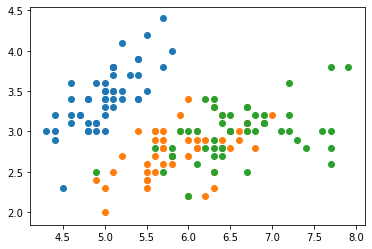

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

plt.scatter(X[y==0,0], X[y==0, 1])
plt.scatter(X[y==1,0], X[y==1, 1])
plt.scatter(X[y==2,0], X[y==2, 1])
plt.show()

In [12]:
def plot_figure(model) : 
    # Make a decision boundary plot
    # Create figure to draw chart
    plt.figure(2, figsize=(10, 8))

    # We create a grid of points contained within [x_min, x_max]x[y_min, y_max] with step h=0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size of the grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        
    # Retrieve predictions for each point of the grid
    Z_GBC = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_GBC = Z_GBC.reshape(xx.shape)

    # Plot the decision boundary (label predicted assigned to a color)
    plt.pcolormesh(xx, yy, Z_GBC, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

    # Format chart
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xticks(())
    plt.yticks(())
    plt.show()

## IV.1. Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
%time dt.fit(X_train, y_train)

print('accuracy:', dt.score(X_test, y_test))

CPU times: user 2.24 ms, sys: 305 µs, total: 2.54 ms
Wall time: 1.7 ms
accuracy: 0.6666666666666666


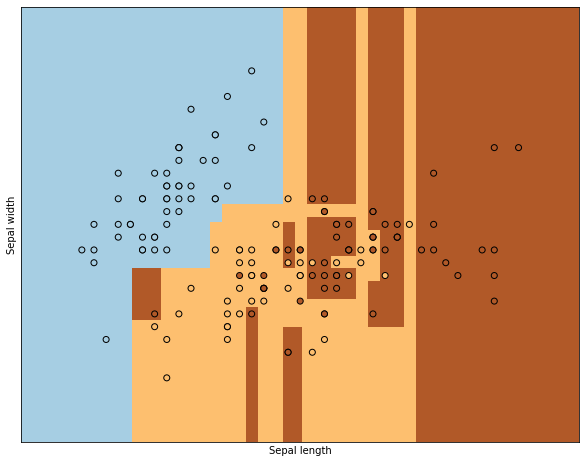

In [14]:
# Plot the figure
plot_figure(dt)

## IV.2. AdaBoost

In [15]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100)
%time ada.fit(X_train, y_train)

print('accuracy:', ada.score(X_test, y_test))

CPU times: user 136 ms, sys: 0 ns, total: 136 ms
Wall time: 136 ms
accuracy: 0.6


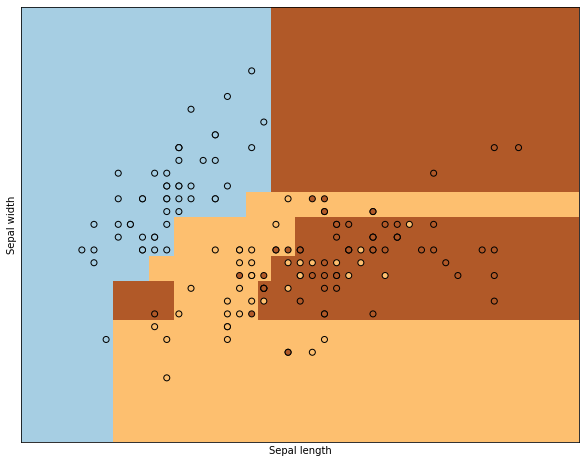

In [16]:
# Plot the figure
plot_figure(ada)

## IV.3. Gradient Boosting

In [19]:
# Import the library
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(n_estimators=10, max_depth=5)
%time GBC.fit(X_train, y_train)

print('accuracy:', GBC.score(X_test, y_test))

CPU times: user 48.3 ms, sys: 4.04 ms, total: 52.4 ms
Wall time: 51.8 ms
accuracy: 0.6666666666666666


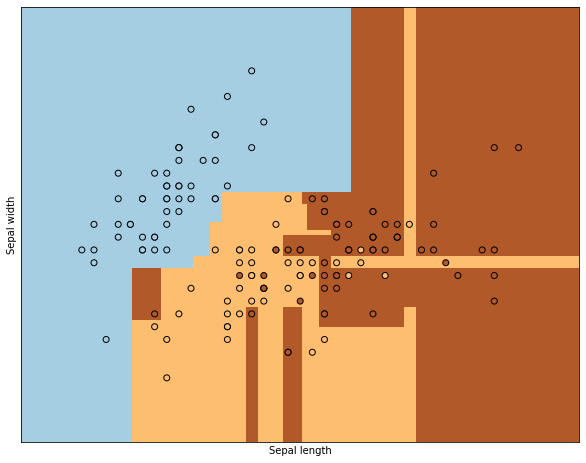

In [20]:
# Plot the figure
plot_figure(GBC)

As you can see, Gradient Boosting may overfit. The following hyperparameters can be used to reduce variance:
- `subsample`: percentage of samples used per tree, by setting it lower than 1 may reduce variance and add bias
- `max_features`: the max number of features to use per split, by setting it to a smaller value it takes a subspace of the features, helping reduce variance
- `n_iter_no_change`: early stopping, it stops the algorithm after the given number of iteration without change to the loss function
- `max_depth`: the maximum depth of the decision trees

Of course, an hyperparameter random or grid search is necessary to optimize properly the hyperparameters.

## IV.4. XGBoost

You may have to install it, for example with the command:

`conda install xgboost`

The API is very similar to the one of scikit-learn, with:
- object instantiation
- model fit with `.fit(X_train, y_train)`
- prediction with `.predict(X_test)`

In [22]:
# Import the library
import xgboost as xgb

# Instantiate the object
xg = xgb.XGBClassifier()
# Fit on the data
%time xg.fit(X_train, y_train)
print('accuracy:', xg.score(X_test, y_test))

CPU times: user 29.9 ms, sys: 77 µs, total: 30 ms
Wall time: 28.1 ms
accuracy: 0.7666666666666667


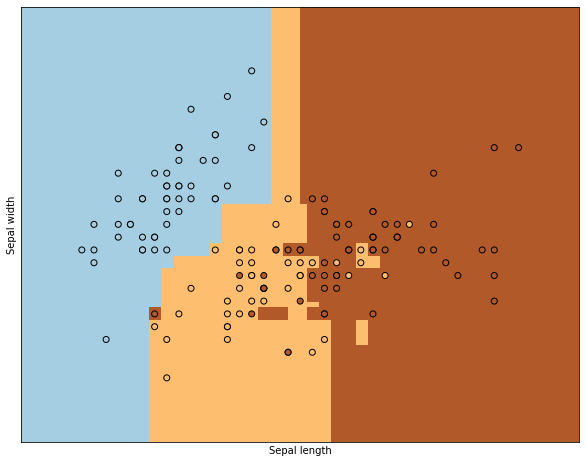

In [23]:
# Plot the figure
plot_figure(xg)

## IV.4. LightGBM

To install it, one can type:

`pip install lightgbm`

In [24]:
import lightgbm as lgb

lg = lgb.LGBMClassifier(silent=False)
%time lg.fit(X_train, y_train)
print('accuracy:', lg.score(X_test, y_test))

CPU times: user 31.1 ms, sys: 0 ns, total: 31.1 ms
Wall time: 33.6 ms
accuracy: 0.6333333333333333


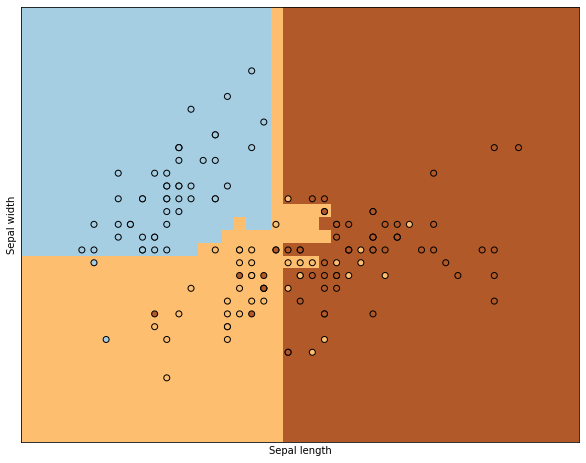

In [25]:
# Plot the figure
plot_figure(lg)

## IV.5. CatBoost

To install catboost:
    
`conda install catboost`

In [26]:
import catboost as cb

cb = cb.CatBoostClassifier(iterations=20, loss_function='MultiClass')
%time cb.fit(X,y)
print('accuracy:', cb.score(X_test, y_test))

0:	learn: 1.0783315	total: 50.5ms	remaining: 959ms
1:	learn: 1.0600054	total: 51.9ms	remaining: 467ms
2:	learn: 1.0419733	total: 53.1ms	remaining: 301ms
3:	learn: 1.0237406	total: 54.3ms	remaining: 217ms
4:	learn: 1.0060854	total: 55.5ms	remaining: 167ms
5:	learn: 0.9880642	total: 56.7ms	remaining: 132ms
6:	learn: 0.9705925	total: 57.8ms	remaining: 107ms
7:	learn: 0.9540200	total: 59.1ms	remaining: 88.6ms
8:	learn: 0.9389742	total: 60.2ms	remaining: 73.6ms
9:	learn: 0.9237246	total: 61.4ms	remaining: 61.4ms
10:	learn: 0.9105866	total: 62.6ms	remaining: 51.2ms
11:	learn: 0.8958291	total: 63.4ms	remaining: 42.3ms
12:	learn: 0.8820254	total: 64.5ms	remaining: 34.7ms
13:	learn: 0.8695045	total: 65.7ms	remaining: 28.2ms
14:	learn: 0.8575453	total: 66.9ms	remaining: 22.3ms
15:	learn: 0.8460796	total: 67.8ms	remaining: 17ms
16:	learn: 0.8351274	total: 68.7ms	remaining: 12.1ms
17:	learn: 0.8239845	total: 69.6ms	remaining: 7.74ms
18:	learn: 0.8137926	total: 70.5ms	remaining: 3.71ms
19:	learn: 0

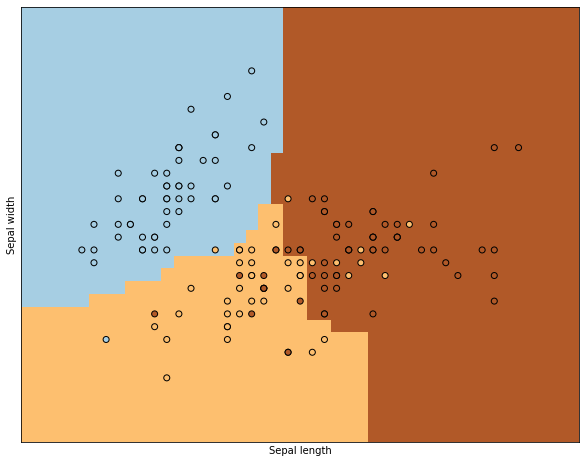

In [27]:
# Plot the figure
plot_figure(cb)

# V. Summary

*Random Forest:*
- is a Bagging algorithm
- that makes a forest of decision trees
- gives the same weight to each decision tree
- grows trees independently

*Adaboost:*
- is a Boosting algorithm
- combines weak learners (most often stumps)
- gives a different weight to each stump depending on their performance
- each stump depends on the mistakes of the previous ones

*Gradient Boosting Regression:*
- is a Boosting algorithm
- combines trees
- computes the residuals of the previous step
- attaches a learning rate to each model

*Gradient Boosting Classification:*
- same as regression
- applies as transformation to allow for classification

*XGBoost:*
- super fast implementation
- Histogram-based split to build trees

*LGBM:*
- developed by Microsoft
- leaf-wise development depending of gradient

*Catboost:*
- developed by Yandex
- supports categorical features
- supports GPU natively